In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Context

In [2]:
train = pd.read_csv(r'Path\train.csv')
test = pd.read_csv(r'Path\test.csv')

## Data quality assessment

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


#### Информация о колонках: типы данных, кол-во пропущенных значений,кол-во колонок и т.д

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Name         100000 non-null  object 
 3   Sex          100000 non-null  object 
 4   Age          96513 non-null   float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Ticket       94819 non-null   object 
 8   Fare         99867 non-null   float64
 9   Cabin        29169 non-null   object 
 10  Embarked     99723 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.4+ MB


В итоге 
* в train 100000 строк, 12 колонок 
* в test 100000 строк, 11 колонок 

In [28]:
#проверим
train.shape

(100000, 12)

Оценим кол - во пустых ячеек в столбцах

In [3]:
train.isnull().sum().sort_values(ascending = False)


Cabin          67866
Ticket          4623
Age             3292
Embarked         250
Fare             134
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
SibSp              0
Parch              0
dtype: int64

In [4]:
# кол - во пустых ячеек в %
missing_percentages_train = (train[train.columns].isnull().sum() / train.shape[0]) * 100
missing_percentages_train.sort_values(ascending = False)

Cabin          67.866
Ticket          4.623
Age             3.292
Embarked        0.250
Fare            0.134
PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
SibSp           0.000
Parch           0.000
dtype: float64

**Получаем, что в столбце Ticket 4623 (4.62%) пропусков, Age 3292 (3.29%) пропусков,Embarked 250(0.25%), а в Cabin 67866 (67.86%), что сильно больше половины.**

## Prepare Data for Analysis ##

In [5]:
# Т.к колонка Cabin больше чем на половину пуста, удаляем ее
# Колонка Name ,на выживаемость меньше всего повлияет ,не несет полезной информации
# Аналогично номер билета
# удаление ненужных колонок
useless_columns = ['Name','Ticket','Cabin']
train_clean = train.drop(columns=useless_columns)
test_clean = test.drop(columns=useless_columns)

In [6]:
# заполнение пропущенных данных
def fill_data(df):
    df_copy = df.copy() #копируем чтобы не изменить оргигинал
    
    #заполняем пропущенные значения для категориальных переменных самым частым значением в колонке
    catigorial_vars = list(df_copy.select_dtypes(include =['object']).columns.values)
    for col in catigorial_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0],inplace = True)
            
    #заполняем пропущенные значения для колличественных переменных медианной по столбцу
    numerical_vars = list(df_copy.select_dtypes(include =['int64','float64']).columns.values)
    for col in numerical_vars:
        if (df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(),inplace = True)
            
    return df_copy        
            


In [7]:
train_full = fill_data(train_clean)
test_full = fill_data(test_clean)

In [11]:
#Проверка после заполнения
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Sex          100000 non-null  object 
 4   Age          100000 non-null  float64
 5   SibSp        100000 non-null  int64  
 6   Parch        100000 non-null  int64  
 7   Fare         100000 non-null  float64
 8   Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 6.9+ MB


In [12]:
test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Pclass       100000 non-null  int64  
 2   Sex          100000 non-null  object 
 3   Age          100000 non-null  float64
 4   SibSp        100000 non-null  int64  
 5   Parch        100000 non-null  int64  
 6   Fare         100000 non-null  float64
 7   Embarked     100000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


## Data exploration ##

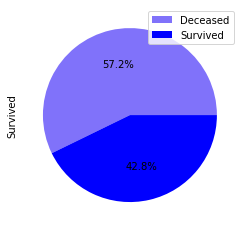

In [13]:
# Визуализация данных
# Процент выживших(Survived) и погибших(Deceased),круговая диаграмма подходит больше всего
plt.figure(figsize=(6,4))
sns.set_palette(["#8072fa","blue"])

train_full['Survived'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%')

plt.legend(labels=['Deceased', 'Survived'])
plt.show()

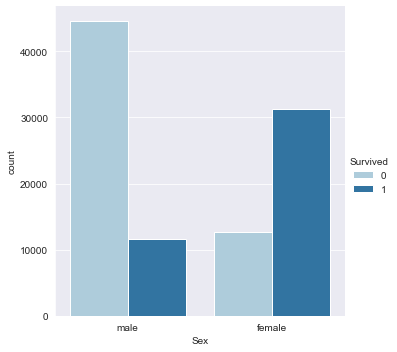

In [47]:
# количество выживших мужчин намного меньше ,чем выживших женщин

#1 вывод: если ты мужчина на Synthanic, вероятность что ты умрешь, гораздо больше

sns.set_style("darkgrid")
sns.catplot(x = 'Sex',data=train_full, hue='Survived',kind = 'count',palette  ='Paired')

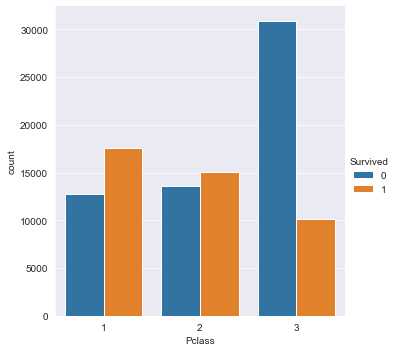

In [13]:
# выживаемость в зависимости от класса
#для визуализации разброса внутри категорий, лучше использовать catplot()
sns.catplot(x = 'Pclass',data=train_full, hue='Survived', kind = 'count')
#2 вывод Если у тебя 1 класс у тебя больше шанс выжить, чем у того кто в 3 классе 
# бедность также влияет на выживаемость
# каюты бедняков были на самом дне(первые,кого подтапливало),не уcпели выбрaться, в отличии от кают богачей,которые были наверху

<AxesSubplot:xlabel='count', ylabel='Pclass'>

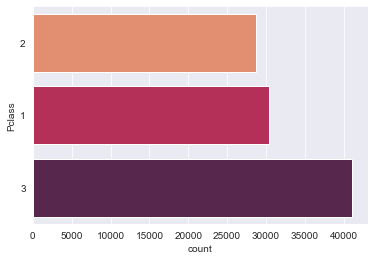

In [53]:
#Третий класс имел больше людей - бедных было больше изначально

sns.countplot(y = 'Pclass', data = train_full,order =train_full['Pclass'].value_counts(ascending=True).index,palette  ='rocket_r')
# чтобы найти количество наблюдений в каждой категориальной ячейке с помощью столбцов, подойдет countplot()


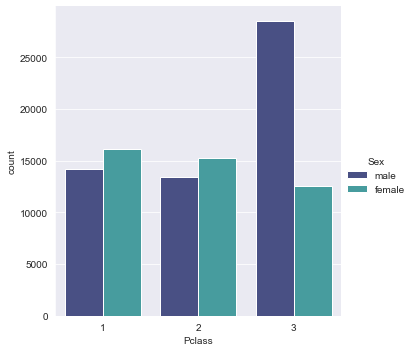

In [32]:
sns.catplot(x = 'Pclass',data=train_full, hue = 'Sex', kind = 'count',palette  ='mako')
#бедных мужчин было больше всего

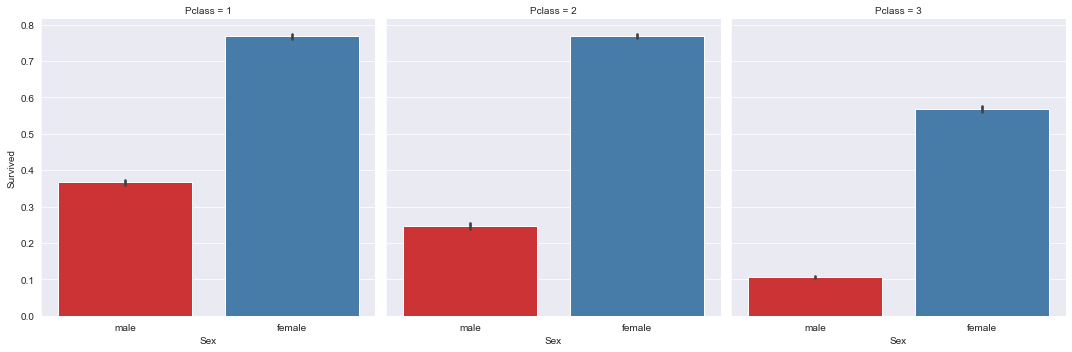

In [112]:
#3 вывод  если ты бедный мужчина на Synthanic, вероятность что ты умрешь, гораздо больше
sns.catplot(x = 'Sex', y ='Survived', col ='Pclass',  data=train_full,  kind = 'bar', palette  ='Set1')

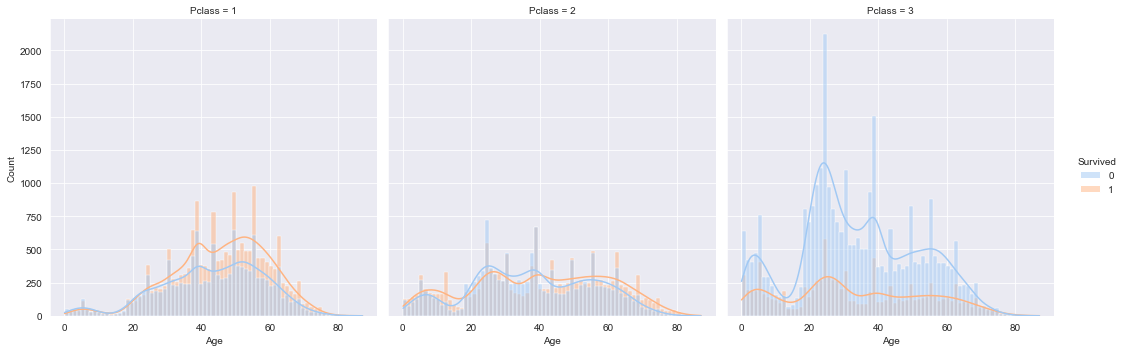

In [45]:
#посмотрим на  выживаемость, в зависимости от класса и возраста 
#изпользуем Гистограммы, показывающие распределение одной числовой переменной displot(), 3 графика для каждого класса
# люди в 3 классе погибали чаще в возрасте от 20-40лет
# В первом классе в возрасте от 40-60 было много выживших,возможно чем статнее человек,тем у него было больше шансов выжить 
# или купить место в шлюпке
sns.displot(data = train_full, x = 'Age',kde=True, hue = 'Survived', col= 'Pclass',palette  ='pastel')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

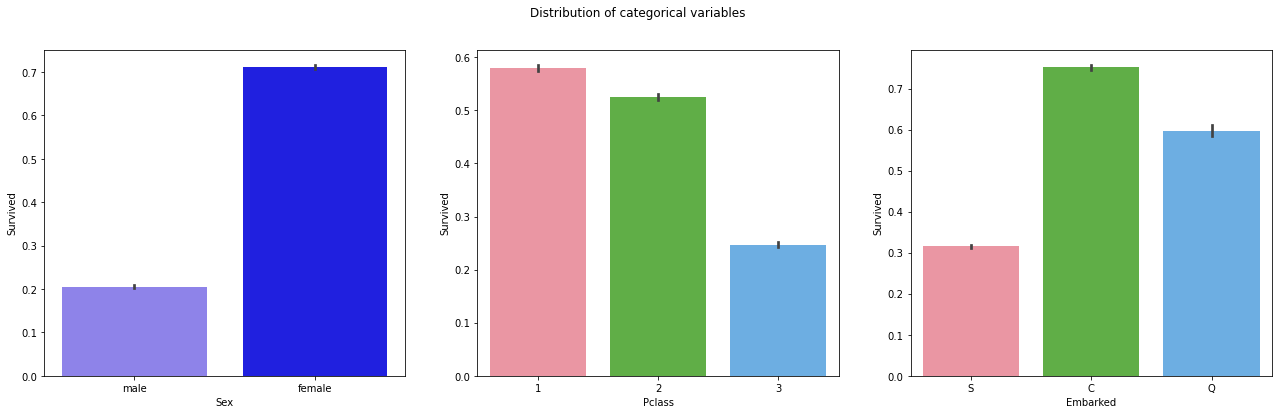

In [20]:
#Распределение категориальных переменных
# Столбчатые диаграммы полезны для сравнения величин, соответствующих различным группам. 
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of categorical variables')
sns.barplot(x = 'Sex', y = 'Survived', data = train_full, ax=axes[0])
sns.barplot(x = 'Pclass', y = 'Survived', data = train_full, ax=axes[1])
sns.barplot(x = 'Embarked', y = 'Survived', data = train_full, ax=axes[2])
# Рассмотрим выживаемость на примере трех категориальных переменных
# Первые два графика понятно - женщин выжило больше чем мужчин,если ты в первом классе шанс выжить больше
# Embarked -  порт погрузки:Большинство людей, которые грузились в Southampton, не выжили. 
# Большинство людей, которые грузились в Cherbourg, выжили.


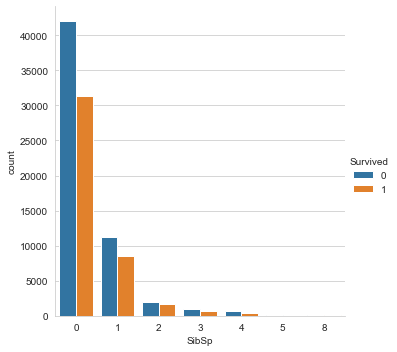

In [63]:
#от кол-ва членов семьи не зависит выживаемость
#4 если есть супруг и родственник, выживаемость чуть ниже смертности

sns.catplot(x = 'SibSp',  data=train_full,hue ='Survived',   kind = 'count')


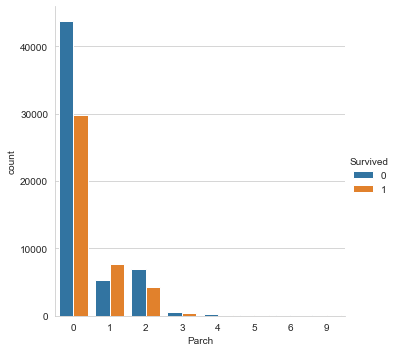

In [60]:
sns.catplot(x = 'Parch',  data=train_full,hue ='Survived',   kind = 'count')
#5 если есть 1 ребенок или  родители, возможно  шанс выжить был больше

In [19]:
#Попробуем соединить колонки SibSp + Parch
#feature engineering
# и создать новую колонку-признак с количеством родственников
train_full['Family_size'] = train_full['Parch'] + train_full['SibSp']
test_full['Family_size'] = test_full['Parch'] + test_full['SibSp']
train_full.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,1,1,male,39.00,2,0,27.14,S,2
1,1,0,3,male,39.00,0,0,13.35,S,0
2,2,0,3,male,0.33,1,2,71.29,S,3
3,3,0,3,male,19.00,0,0,13.04,S,0
4,4,1,3,male,25.00,0,0,7.76,S,0


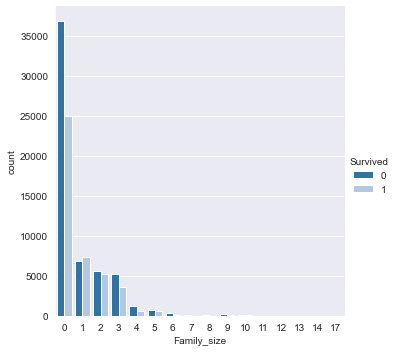

In [28]:
# новые случаи выживания с новым признаком
# ничего не поменялось, хотя самое очевидное - если пассажир одинок,вероятность смерти больше
sns.catplot(x ='Family_size',  data=train_full,hue ='Survived',   kind = 'count',palette  ='tab20')

## Summary ##

**Если ты богатая женщина из 1 класса, от 40 до 60 лет, шанс выжить на Synthanic очень велик (возможно, купив себе шлюпку,т.к их не хватало)**

**Если ты богатая женщина из 1 класса, от 40 до 60 лет, севшая в Порте Шербура,шанс выжить еще больше велик на Synthanic**

**"Значительную часть новых пассажиров составили богатые американцы, закончившие свой зимний сезон в Монте-Карло, Ницце, Канне и других курортах Ривьеры" - выдержка из истории про корабль**



### Задание с Kaggle ###

In [72]:
#выбираем всех мужчин с 3 класса(бедные) и указываем что они не выжили
simple_pred = (~((test_full['Sex']=='male') & (test_full['Pclass']==3))).astype(int).values

In [73]:
#функция для составление файла для kaggle
def make_file(prediction,test_data,name):
    result = pd.DataFrame({'PassengerId':test_data.reset_index()['PassengerId'],'Survived':prediction})
    result.to_csv(name, index=False)
    

In [74]:
make_file(simple_pred,test,'synthanic_simple_base.csv')

In [75]:
 sam_sub = pd.read_csv(r'Path\synthanic_simple_base.csv')

In [76]:
sam_sub.head()

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,1
4,100004,1


In [21]:
# видим явную зависимость выживаемости от пола и класса каюты.
#В качестве признаков возьмем пол и класс каюты,  Итоговый список :
features = ['Sex', 'Pclass', 'SibSp', 'Parch']
#features = ['Sex', 'Pclass']
y = train_full['Survived']

In [22]:
#в столбце Sex находятся не числа, а строки, поменяем значения на 0 и 1
X = pd.get_dummies(train_full[features])
X_test = pd.get_dummies(test_full[features])

In [23]:
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,1,2,0,0,1
1,3,0,0,0,1
2,3,1,2,0,1
3,3,0,0,0,1
4,3,0,0,0,1


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)  # обучаем модель
prediction = model.predict(X_test)  # делаем предсказание
output = pd.DataFrame({'PassengerId':test_full.PassengerId, 'Survived':prediction})
output.to_csv('my_submission.csv', index=False)  # формируем  датафрейм и сохраняем его в csv файл

In [25]:
sam_sub_rf = pd.read_csv(r'Path\my_submission.csv')
sam_sub_rf.head()

,PassengerId,Survived
0,100000,0
1,100001,1
2,100002,1
3,100003,0
4,100004,1
